In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


In [2]:
print("Hello... Raja is working on Fashion mnist dataset")

Hello... Raja is working on Fashion mnist dataset


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [4]:
train_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test = test_data[:,1:]/255
y_test = test_data[:,0]


In [7]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

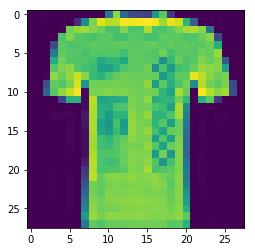

In [8]:
image = x_train[150, :].reshape((28,28))
plt.imshow(image)
plt.show()

#cnn buildmodel, compile, fit 

In [9]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape {}'.format(x_train.shape))
print('x_test shape {}'.format(x_test.shape))
print('x_validate shape {}'.format(x_validate.shape))


x_train shape (48000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)
x_validate shape (12000, 28, 28, 1)


In [10]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
    
])

In [11]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(0.001),
    metrics=['accuracy']
)

In [12]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 263us/step - loss: 0.7658 - acc: 0.7415 - val_loss: 0.4894 - val_acc: 0.8287
Epoch 2/10
48000/48000 [==============================] - 12s 246us/step - loss: 0.4559 - acc: 0.8396 - val_loss: 0.4103 - val_acc: 0.8577
Epoch 3/10
48000/48000 [==============================] - 12s 246us/step - loss: 0.3973 - acc: 0.8604 - val_loss: 0.3686 - val_acc: 0.8740
Epoch 4/10
48000/48000 [==============================] - 12s 241us/step - loss: 0.3632 - acc: 0.8710 - val_loss: 0.3389 - val_acc: 0.8833
Epoch 5/10
48000/48000 [==============================] - 12s 242us/step - loss: 0.3427 - acc: 0.8788 - val_loss: 0.3253 - val_acc: 0.8847
Epoch 6/10
48000/48000 [==============================] - 12s 240us/step - loss: 0.3255 - acc: 0.8863 - val_loss: 0.3095 - val_acc: 0.8922
Epoch 7/10
48000/48000 [==============================] - 12s 242us/step - loss: 0.3103 - acc: 0.8904 - val_loss: 0.

In [13]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('test loss {:4f}'.format(score[0]))
print('test acc {:4f}'.format(score[1]))

test loss 0.279685
test acc 0.904300
